<a href="https://colab.research.google.com/github/lebe1/ClimateChangeAI/blob/main/Data-Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import random
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Dataset analysis first overview

By downloading the dataset, the reader stumbles across an important on the download page [zenodo.org](https://zenodo.org/records/5153305): 
```quote
It is recommended to read the supplementary info file before using the dataset. For example, it clarifies the time conventions and that NAs are indicated by the number -999 in the runoff time series.
```
This is something to keep in mind for.

Further, reading from the file '/info_english/2_Timeseries.txt' in the LAMAH-dataset, it says:
```quote
[...] Unit of runoff data is m3/s. Conversion to runoff heights can be performed using the catchment area provided (attribute “area_gov” in Appendix A of the accompanying paper). 
The units of the meteorological time series can be obtained from Appendix A of the accompanying paper[...].
The meteorological time series have no gaps.
``` 

This gives us several important insights. First, there is quite an important paper referring to the dataset, which is named [Klingler, C., K. Schulz, and M. Herrnegger. ‘LamaH-CE: LArge-SaMple DAta for Hydrology and Environmental Sciences for Central Europe’. Earth System Science Data 13, no. 9 (2021): 4529–65.](https://doi.org/10.5194/essd-13-4529-2021) and further just as referred as 'the paper'.

We have a given unit of runoff data of m3/s and could convert it to runoff heights with the given catchment area provided. Due to our task of predicting the precipitation with the given data, the runoff data itself is good enough for us.

Exploring this paper further, there is a map given, which represents the datasets catchment overview with river regions and gauge elevations.

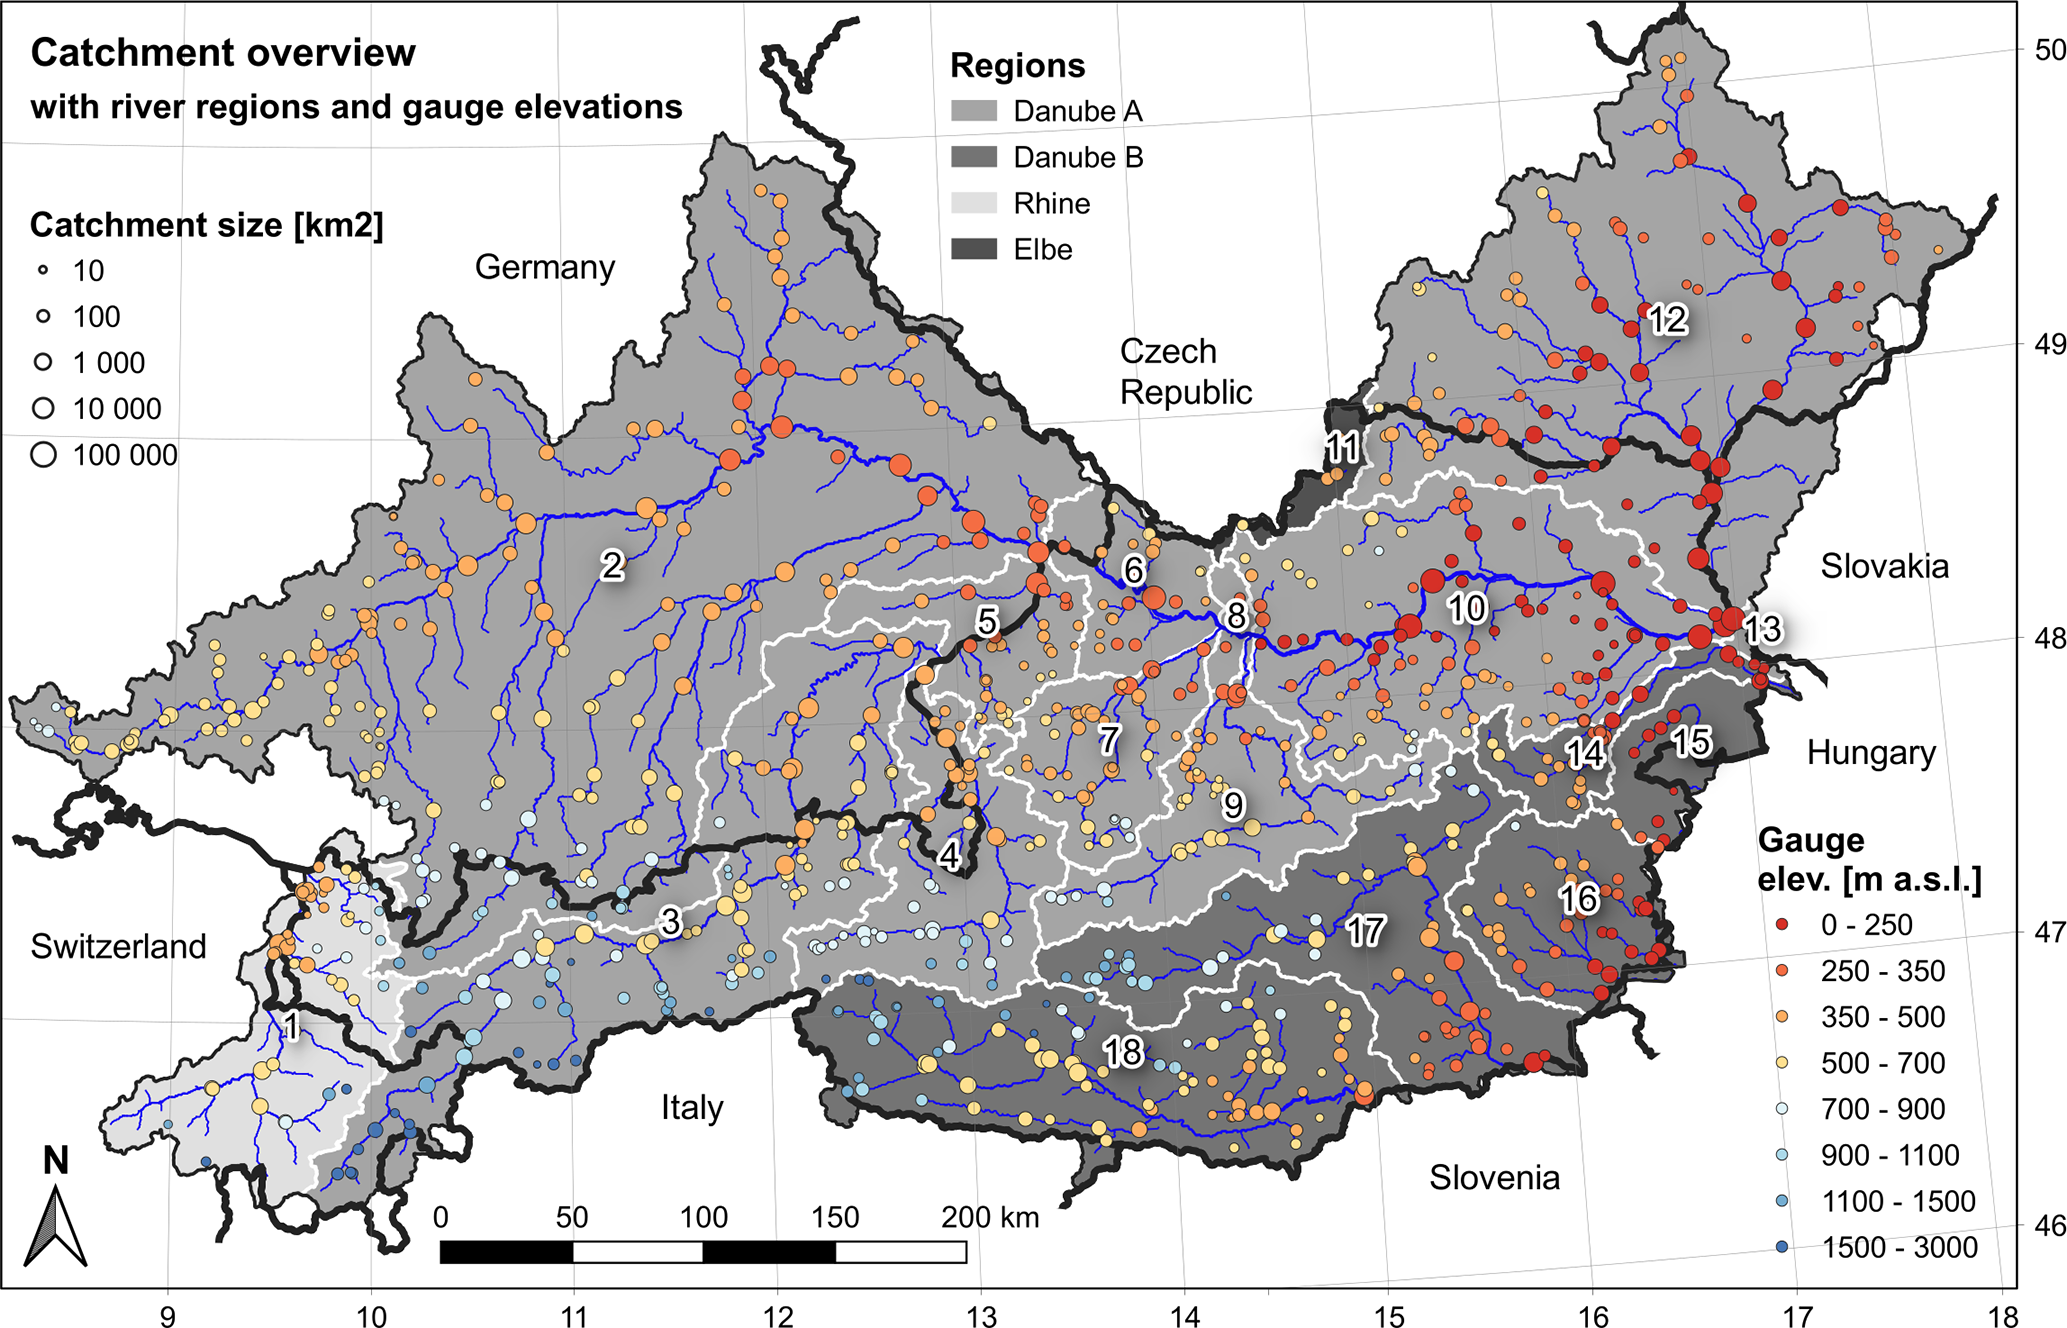

The description of this image is further: "Overview of the area covered in LamaH (grey tones), and the runoff gauges with gauge elevation (circle color) and catchment
area (circle size). LamaH is divided into different river regions, which are bordered by the white lines. The black numbers are abbreviations
of the individual regions, which are indicated in Table B1. The national borders are shown as thick black lines. Source of stream network:
HydroATLAS (Linke et al., 2019). © EuroGeographics for the administrative boundaries."

Therefore Table B1 is quite interesting to look at, which is shown in the appendix.

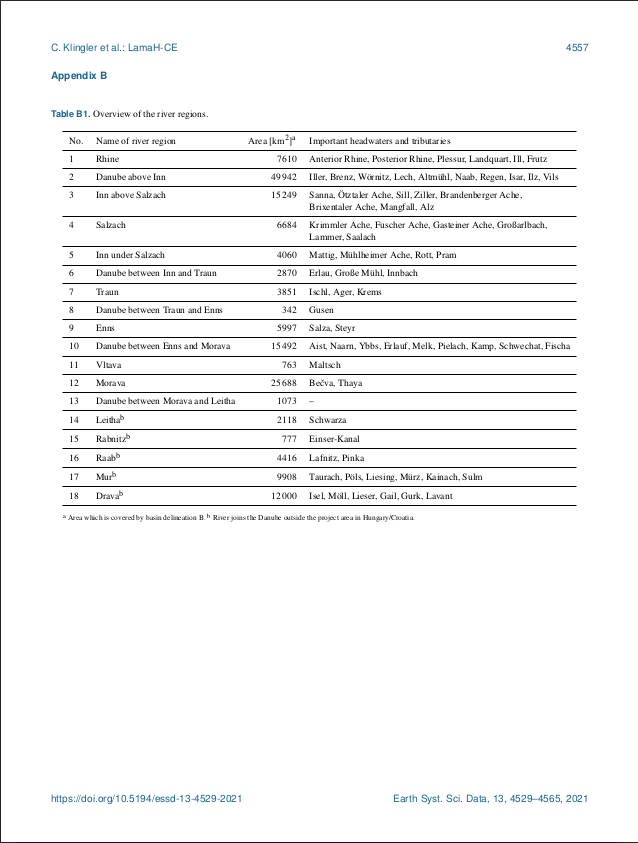

The more detailed overview of each single measurement spot can be found in a directory of the dataset itself 'D_gauges/1_attributes/Gauge_attributes.csv'. There is a region listed belonging to Table B1, a river listed as well as a longitude, a latitude and an elevation.

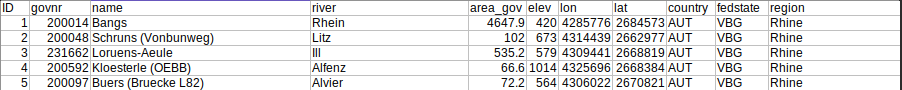


In the actual directory 'A_basins_total_upstrm/2_timeseries/daily/*.csv', there are 860 csv files.\
File numbers are starting from 1 to 882 with the name of "ID_{number}.csv" like "ID_1.csv" but not all numbers are represented like 400. \
There must be some inconsistency in the measurement spots, since the dataset of the gauge attributes also list 882 spots.\


Per each csv file, there are 25 columns. Each column is also explained in a table in the appendix of the paper.\

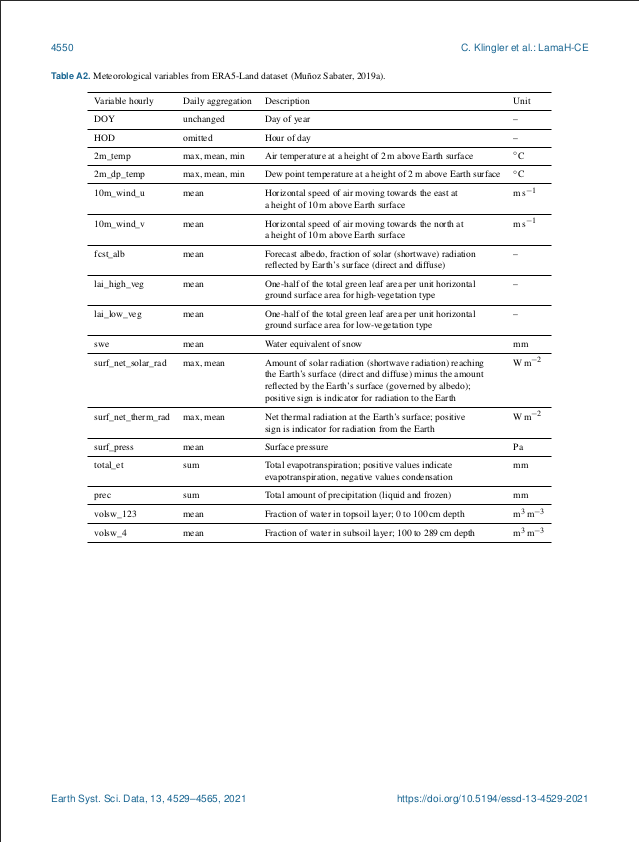




# Step 1 - Data Loading

Create random seed given by number 100

In [2]:
random.seed(100)
print(random.random())

0.1456692551041303


Check length of whole directory and of newly created random list

In [3]:
# Check how many files are stored in the directory
paths = "/home/funny/Documents/Uni/Climate_Change_AI/Project 2/Dataset/A_basins_total_upstrm/2_timeseries/daily"

# Get all the files in the directory
files = os.listdir(paths)

# Check length of files
print(len(files)) # 860

random_list = random.sample(files, 100)

# Check output of random_list
print(random_list)

# Check if the list is unique
print(len(random_list) == len(set(random_list)))

# Check if list has length 100
print(len(random_list) == 100)

860
['ID_651.csv', 'ID_158.csv', 'ID_349.csv', 'ID_101.csv', 'ID_44.csv', 'ID_783.csv', 'ID_38.csv', 'ID_752.csv', 'ID_684.csv', 'ID_364.csv', 'ID_150.csv', 'ID_805.csv', 'ID_377.csv', 'ID_629.csv', 'ID_739.csv', 'ID_577.csv', 'ID_390.csv', 'ID_823.csv', 'ID_490.csv', 'ID_433.csv', 'ID_769.csv', 'ID_799.csv', 'ID_443.csv', 'ID_492.csv', 'ID_183.csv', 'ID_829.csv', 'ID_211.csv', 'ID_64.csv', 'ID_6.csv', 'ID_518.csv', 'ID_370.csv', 'ID_185.csv', 'ID_74.csv', 'ID_291.csv', 'ID_746.csv', 'ID_706.csv', 'ID_549.csv', 'ID_104.csv', 'ID_541.csv', 'ID_501.csv', 'ID_275.csv', 'ID_446.csv', 'ID_861.csv', 'ID_248.csv', 'ID_299.csv', 'ID_744.csv', 'ID_547.csv', 'ID_691.csv', 'ID_703.csv', 'ID_828.csv', 'ID_584.csv', 'ID_288.csv', 'ID_494.csv', 'ID_662.csv', 'ID_118.csv', 'ID_3.csv', 'ID_220.csv', 'ID_379.csv', 'ID_645.csv', 'ID_539.csv', 'ID_867.csv', 'ID_136.csv', 'ID_169.csv', 'ID_114.csv', 'ID_105.csv', 'ID_627.csv', 'ID_521.csv', 'ID_319.csv', 'ID_258.csv', 'ID_474.csv', 'ID_122.csv', 'ID_29.cs

Load the data from the 100 random generated IDs

In [4]:
# Create a list of the paths to the files
paths = "~/Documents/Uni/Climate_Change_AI/Project 2/Dataset/A_basins_total_upstrm/2_timeseries/daily/"
df_list = []
for file_name in random_list:
    paths += file_name
    df = pd.read_csv(paths, sep=";")
    df_list.append(df)
    paths = "~/Documents/Uni/Climate_Change_AI/Project 2/Dataset/A_basins_total_upstrm/2_timeseries/daily/"

pd.set_option('display.max_colwidth', 2000)
df_list[0].head()


,YYYY,MM,DD,DOY,2m_temp_max,2m_temp_mean,2m_temp_min,2m_dp_temp_max,2m_dp_temp_mean,2m_dp_temp_min,...,swe,surf_net_solar_rad_max,surf_net_solar_rad_mean,surf_net_therm_rad_max,surf_net_therm_rad_mean,surf_press,total_et,prec,volsw_123,volsw_4
0,1981,1,1,1,1.8,0.5,-1.5,0.8,-1.7,-4.2,...,3.06,157,29,72,37,96531,0.86,5.76,0.48,0.47
1,1981,1,2,2,1.7,0.3,-1.6,1.1,-1.3,-4.1,...,7.49,85,17,55,18,96493,0.25,11.67,0.48,0.47
2,1981,1,3,3,5.5,4.0,2.4,4.9,3.0,1.0,...,9.01,31,6,63,9,95054,0.40,20.14,0.49,0.47
3,1981,1,4,4,2.7,1.2,-2.0,1.5,-0.3,-5.1,...,5.24,152,29,75,43,94903,0.85,5.39,0.50,0.48
4,1981,1,5,5,-0.1,-1.6,-2.6,-3.4,-5.3,-6.8,...,9.58,174,33,68,43,95956,0.64,4.56,0.49,0.48


In [5]:
# Check that df_list has length 100
print(len(df_list) == 100)

# Check that all the dataframes have the same length as the first dataframe
for df in df_list:
    if (len(df) == len(df_list[0])):
       continue
    else:
        print("Dataframes do not have the same length")

# Check that all the dataframes have the same columns as the first dataframe
for df in df_list:
    if (df.columns == df_list[0].columns).all():
        continue
    else:
        print("Dataframes do not have the same columns")

True


# Step 2 - Null Value Analysis  

1. Check for obvious null values

In [6]:
# Check for null values
for df in df_list:
    if df.isnull().values.any():
        print("There are null values in the dataframe")
    else:
        continue

# Check for values of -999
for df in df_list:
    if (df == -999).values.any():
        print("There are values of -999 in the dataframe")
    else:
        continue

2. Check for more hidden null values such as missing rows i.e. a day where a measurement could not take place

In [7]:
# Check if a year is a leap year
def is_leap_year(year):
    return (year % 4 == 0 and year % 100 != 0) or year % 400 == 0

# Check that each year has 365 or 366 days depending if it is a leap year or not
# Since we checked that all the dataframes have the same length as the first dataframe, we can just check the first dataframe
years_list = df_list[0]["YYYY"].unique()
for year in years_list:
    # Check if the year is a leap year
    if is_leap_year(year):
        # Check if the dataframe has 366 days
        if len(df_list[0][df_list[0]["YYYY"] == year]) == 366:
            continue
        else:
            print("Year {} does not have 366 days".format(year))
    else:
        # Check if the dataframe has 365 days
        if len(df_list[0][df_list[0]["YYYY"] == year]) == 365:
            continue
        else:
            print("Year {} does not have 365 days".format(year))

# Check if first dataframe has the number of years from 1981 to 2019
years_list = df_list[0]["YYYY"].unique()
for year in range(1981, 2020):
    if year in years_list:
        continue
    else:
        print("Year {} is not in the dataframe".format(year))

# Check if the dataframes have the same number of years as the first dataframe
for df in df_list:
    if len(df["YYYY"].unique()) == len(df_list[0]["YYYY"].unique()):
        continue
    else:
        print("Dataframes do not have the same number of years")



### Reflection

Not a single null values or any value of -999 could be obtained. There is also not a single line missing in one dataframe missing, meaning on each random location were measurements taken every single day from 1981 to 2019.

Another insight is that column 'swe' has a lot of 0's, which makes sense since swe stands for 'Water equivalent of snow' and perfectly fitting to the summer month where usually no snow is occurring each column contains a lot of 0.

# Step 3 - Statistical Analysis

## 1. Summary statistics  
Calculates descriptive statistics for numerical columns like mean, median, standard deviation, min, max, etc.
Plot boxplots for each theme and check for outliers

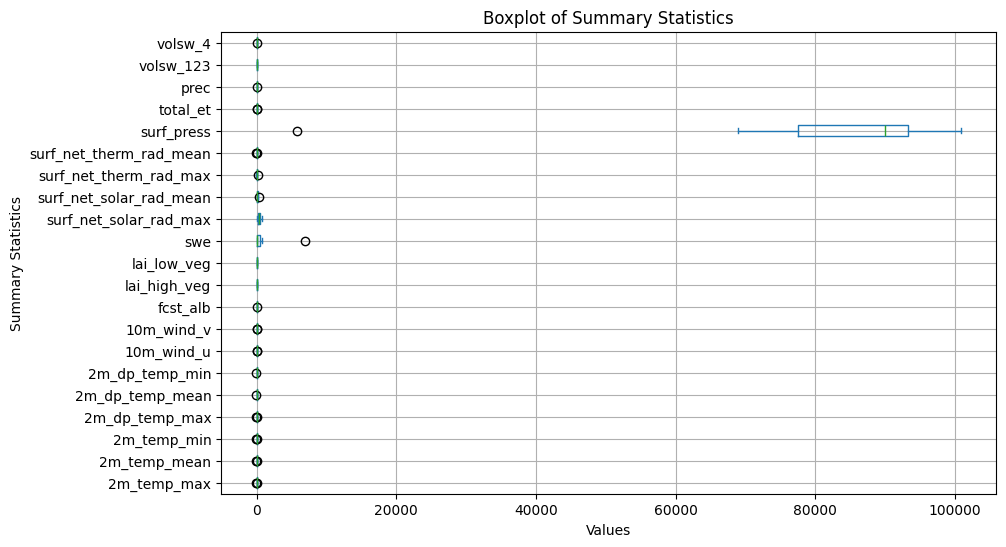

In [8]:
# Concat all df into one df
df = pd.concat(df_list)

# Describe the data to get summary statistics without the first four columns
numerical_columns = df.columns[4:]

# Calculate summary statistics
summary_stats = df[numerical_columns].describe()

# Remove the count row
summary_stats = summary_stats.drop('count', axis=0)

ax = summary_stats.plot(kind='box', vert=False, figsize=(10, 6))
#ax.set_xscale('log')
plt.title('Boxplot of Summary Statistics')
plt.xlabel('Values')
plt.ylabel('Summary Statistics')
plt.grid(True)
plt.show()

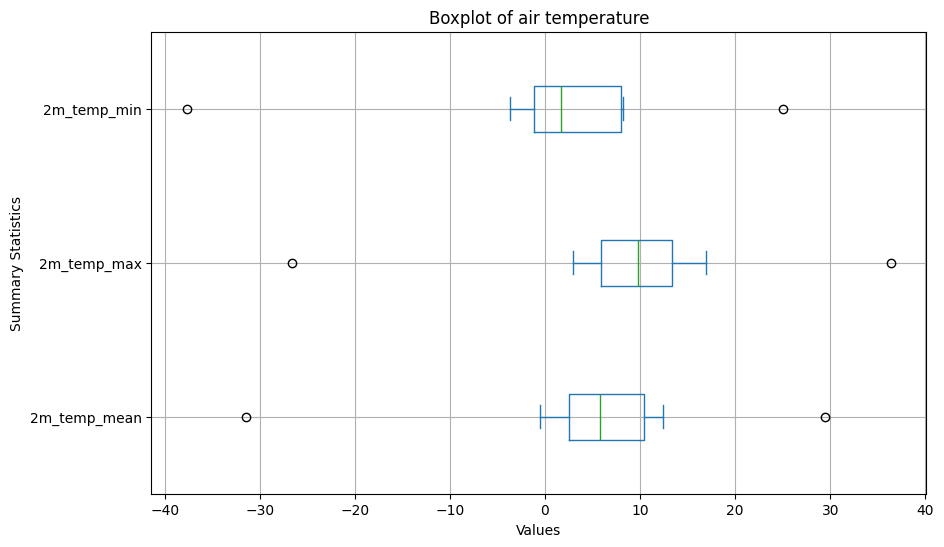

In [9]:
# Describe the data to get summary statistics without the first four columns
numerical_columns = ["2m_temp_mean", "2m_temp_max", "2m_temp_min"]

# Calculate summary statistics
summary_stats = df[numerical_columns].describe()

# Remove the count row
summary_stats = summary_stats.drop('count', axis=0)

ax = summary_stats.plot(kind='box', vert=False, figsize=(10, 6))
#ax.set_xscale('log')
plt.title('Boxplot of air temperature')
plt.xlabel('Values')
plt.ylabel('Summary Statistics')
plt.grid(True)
plt.show()

Text(0, 0.5, 'Summary Statistics')

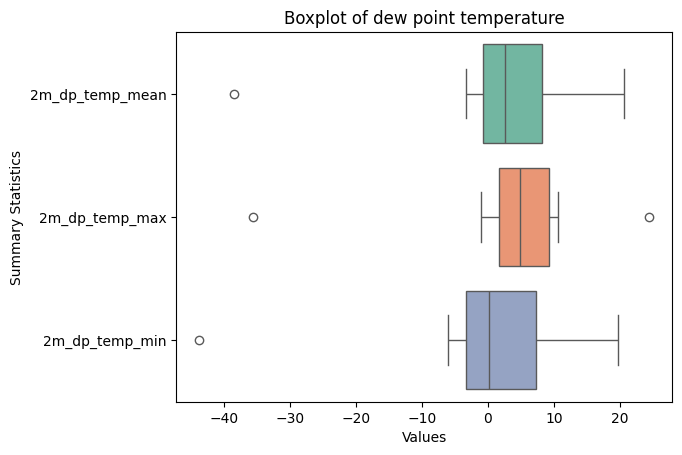

In [10]:
# Describe the data to get summary statistics without the first four columns
numerical_columns = ["2m_dp_temp_mean", "2m_dp_temp_max", "2m_dp_temp_min"]

# Calculate summary statistics
summary_stats = df[numerical_columns].describe()

# Remove the count row
summary_stats = summary_stats.drop('count', axis=0)

# Boxplot via seaborn
sns.boxplot(data=summary_stats, orient="h", palette="Set2")


# ax = summary_stats.plot(kind='box', vert=False, figsize=(10, 6))
# #ax.set_xscale('log')
plt.title('Boxplot of dew point temperature')
plt.xlabel('Values')
plt.ylabel('Summary Statistics')
# plt.grid(True)
# plt.show()

TODO: Continue with all the other values

## 2. Correlation matrix

<Axes: >

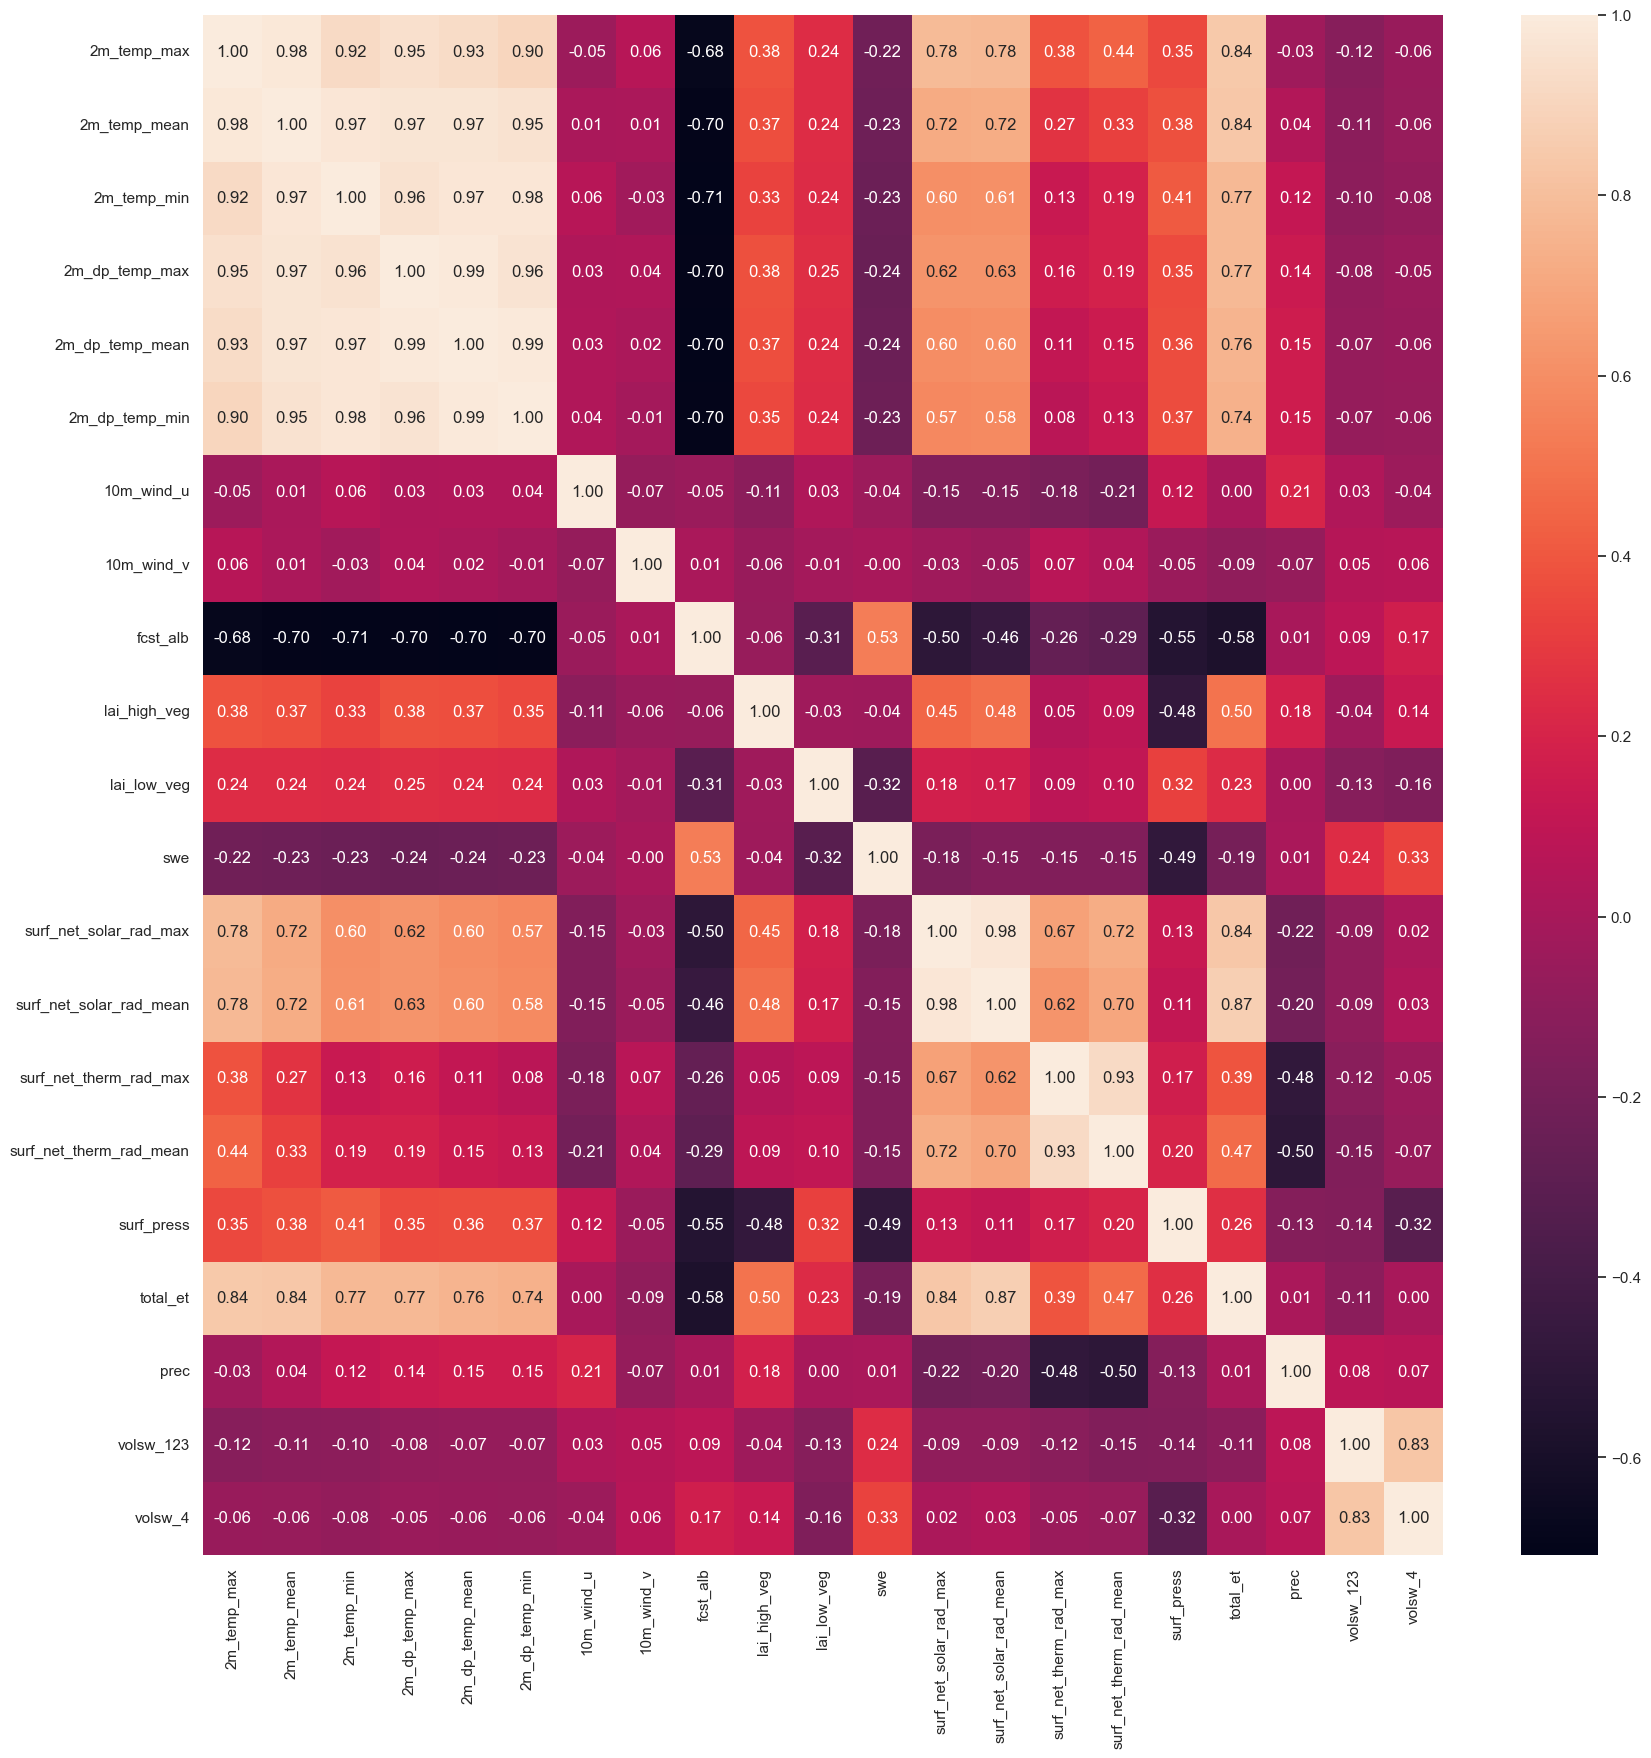

In [11]:
# Get all columns except the first four
numerical_columns = df.columns[4:]

# Calculate correlation matrix via seaborn
sns.set_theme()
plt.figure(figsize=(20, 20))

# Plot the correlation matrix
sns.heatmap(df[numerical_columns].corr(), annot=True, fmt=".2f")

## 3. Histogram

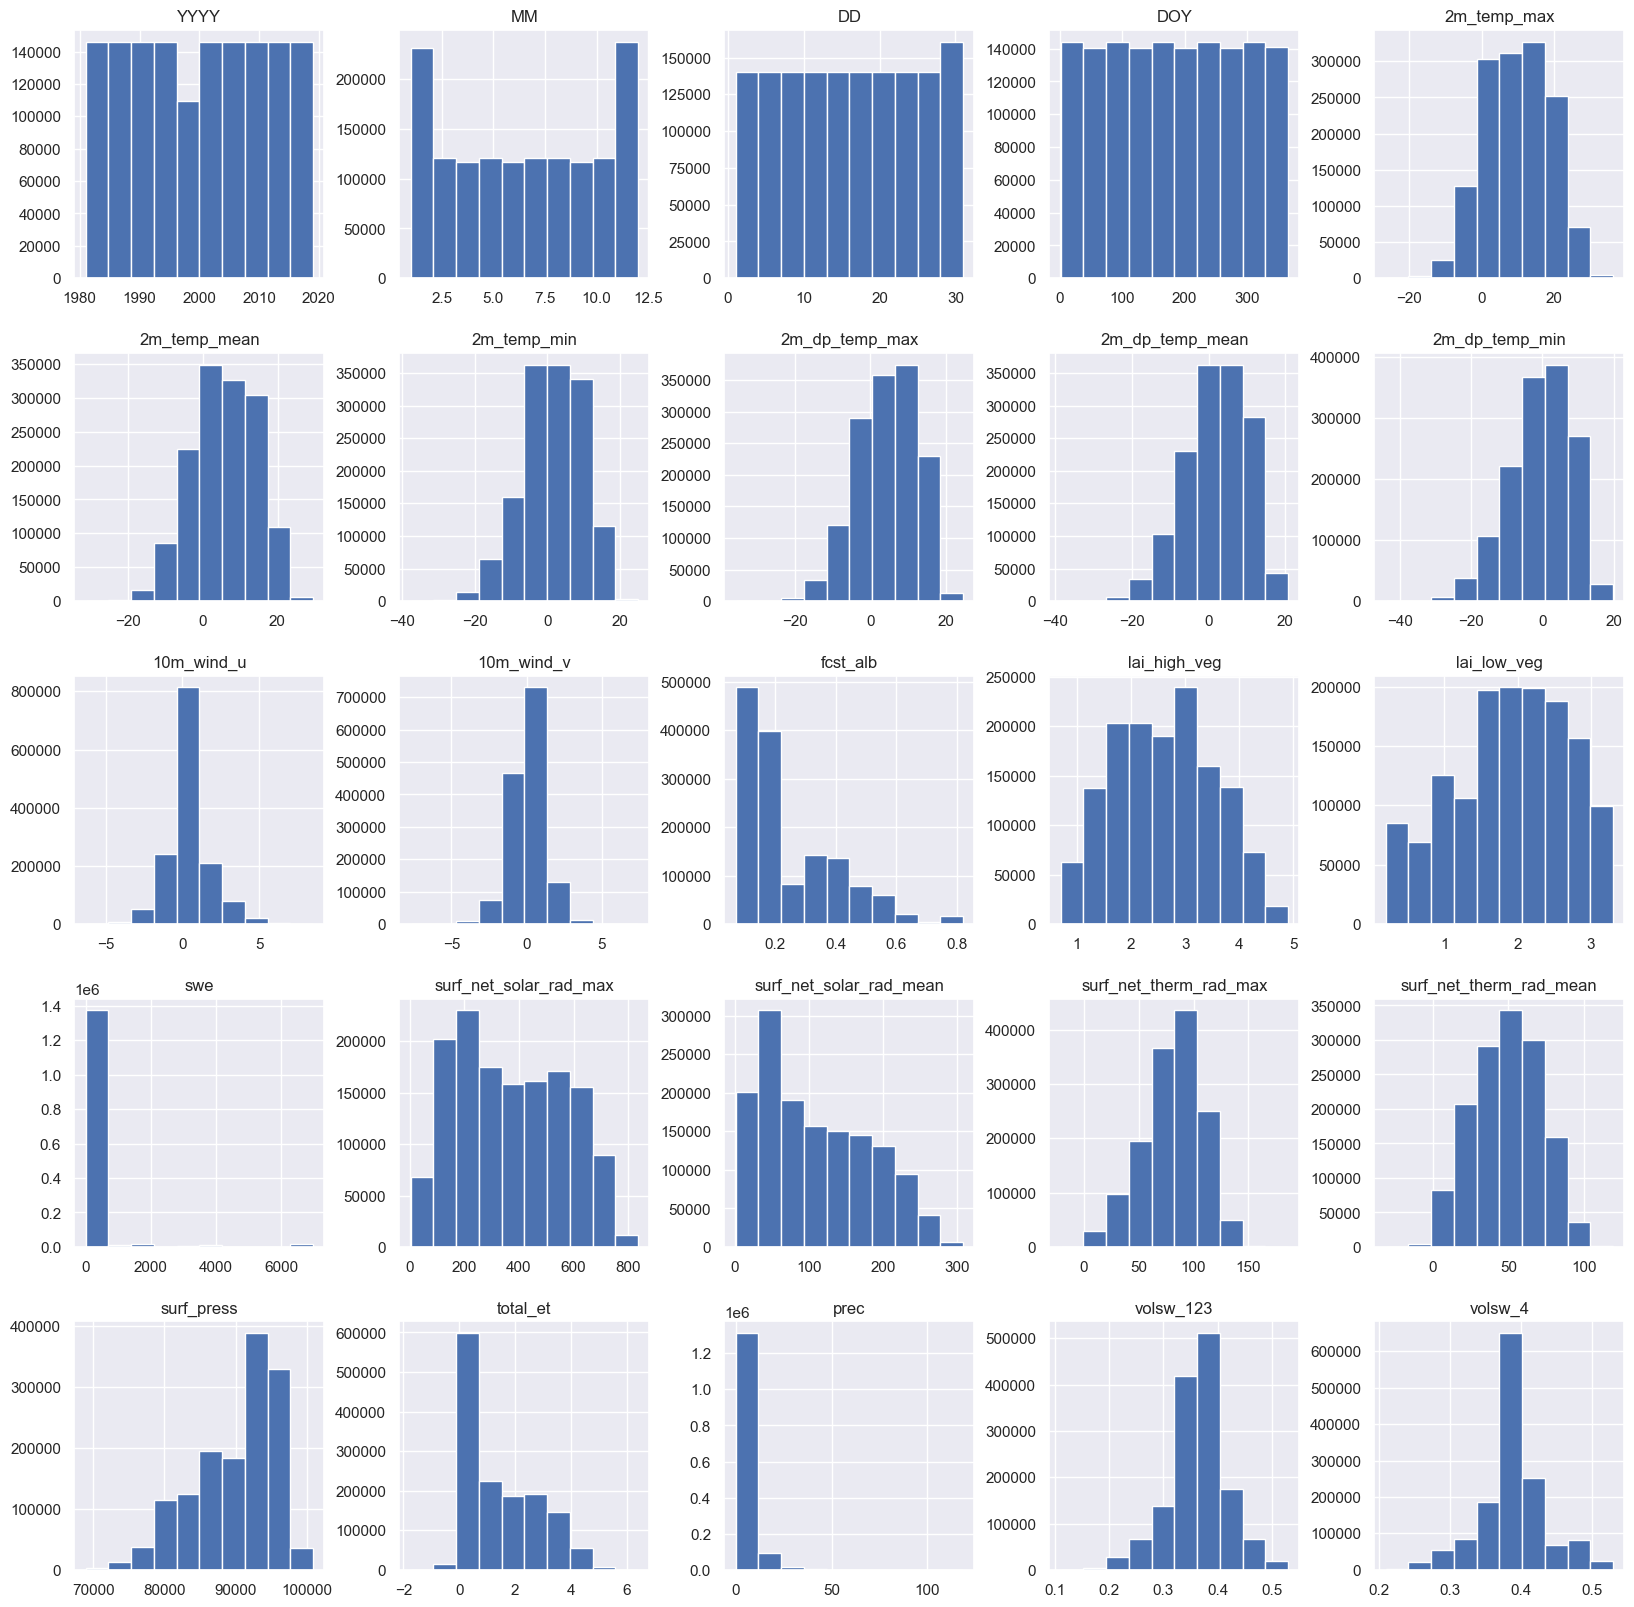

In [12]:
# Plot histogram of the data
df.hist(figsize=(20, 20))
plt.show()

Sample plot of precipitation from year 1981 to 2019

<Axes: xlabel='YYYY,MM'>

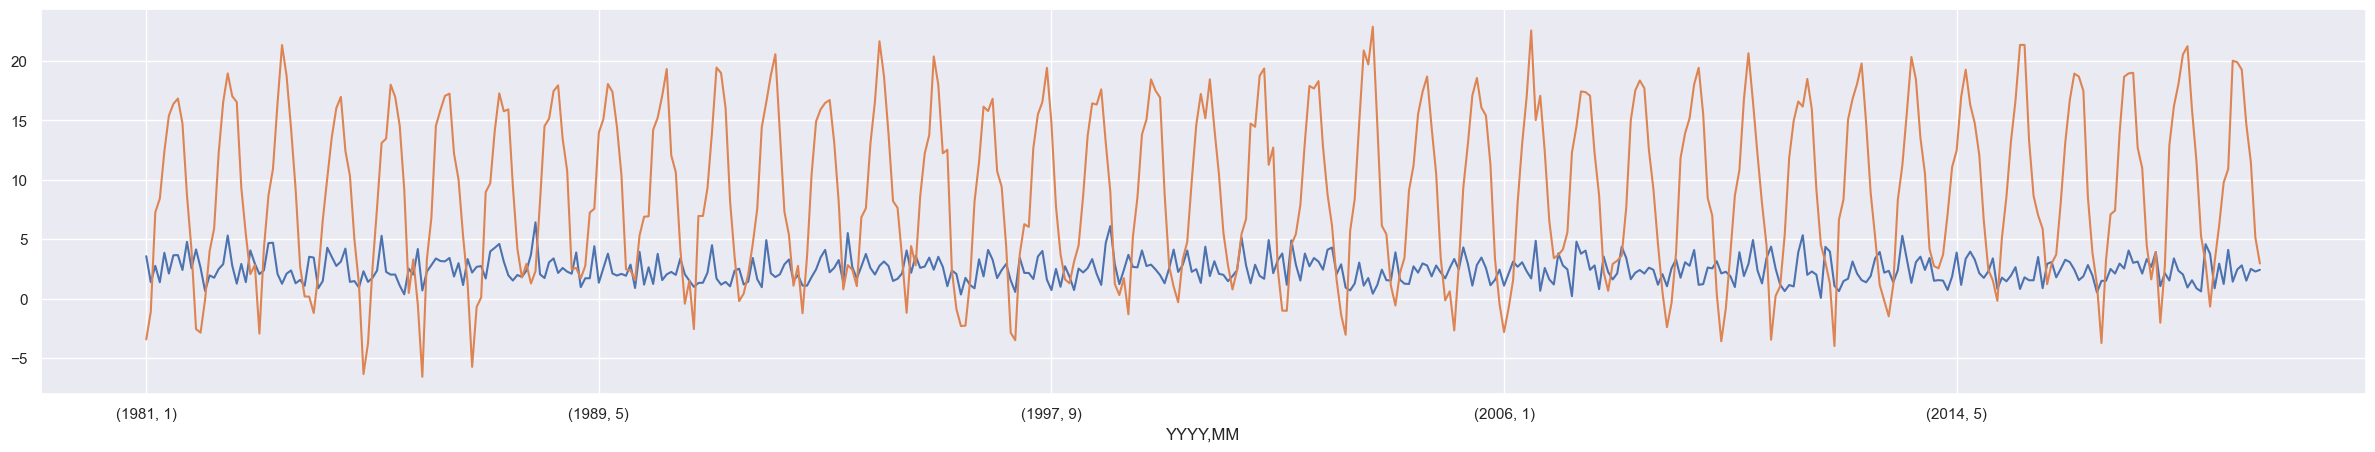

In [18]:
sample_one = df_list[0].groupby(["YYYY", "MM"]).mean()
plt.figure(figsize = (30, 5))
sample_one["prec"].plot()
#sample_one["2m_temp_mean"].plot()

# Step 4 - Data Preprocessing
Impute missing values and transform/normalize any data, if needed

### Thoughts before action
Since we could not find any missing values or null values, imputation is not necessary.
Therefore, we can describe the next steps as follows:

1. First, we add the columns longitude, latitude and elevation from the table gauges_attributes.csv in folder 'D_gauges/1_attributes'


2. Next, we split the dataset into a training dataset 70% and a test dataset 30%
3. Found some unreasonable outliers, therefore will transform outliers to mean value of the last two days before but first will have a detailed look at each context
4. We found the column surf_press with very high values comparing to the other columns (mean of appr. 90000 vs mean of 0) and the column swe (mean of appr. 500 vs mean of 0). Therefore, we normalize the whole dataset. 

### 1. step
Add columns longitude, latitude and elevation to main dataframe

In [13]:
paths_to_gauges = "~/Documents/Uni/Climate_Change_AI/Project 2/Dataset/D_gauges/1_attributes/Gauge_attributes.csv"
element_ids = [int(item.lstrip("ID_").rstrip(".csv")) for item in random_list]

# Add 0 to element_ids to get the header of the csv file
element_ids.append(0)

# Read the csv file
df_gauges = pd.read_csv(paths_to_gauges, sep=";", header=0, usecols=[0,5,6,7], skiprows=lambda x: x not in element_ids)

# Remove 0 from element_ids
element_ids.remove(0)

# Check for null values
if df_gauges.isnull().values.any():
    print("There are null values in the dataframe")

# Check for values of -999
if (df_gauges == -999).values.any():
    print("There are values of -999 in the dataframe")

df_gauges.head()

# Iterate over the element_ids and get the corresponding gauge attributes
for i in range(len(element_ids)):

    # Get the positional arguments
    positional_arguments = df_gauges.iloc[:, 1:][df_gauges["ID"] == element_ids[i]]

    df_item = df_list[i]
    df_item["elev"] = positional_arguments.iat[0, 0]
    df_item["lon"] = positional_arguments.iat[0, 1]
    df_item["lat"] = positional_arguments.iat[0, 2]
    df_list[i] = df_item

# Check if the positional arguments have been added to the dataframes
df_list[9].head()

,YYYY,MM,DD,DOY,2m_temp_max,2m_temp_mean,2m_temp_min,2m_dp_temp_max,2m_dp_temp_mean,2m_dp_temp_min,...,surf_net_therm_rad_max,surf_net_therm_rad_mean,surf_press,total_et,prec,volsw_123,volsw_4,elev,lon,lat
0,1981,1,1,1,5.3,2.5,-0.3,0.1,-3.1,-5.7,...,84,55,96664,0.80,0.73,0.39,0.35,155,4802286,2801832
1,1981,1,2,2,2.4,0.7,-1.1,-1.5,-4.0,-6.8,...,81,64,96776,0.68,1.63,0.39,0.35,155,4802286,2801832
2,1981,1,3,3,7.2,5.3,2.7,2.8,0.9,-1.0,...,60,37,95417,1.50,5.86,0.39,0.36,155,4802286,2801832
3,1981,1,4,4,5.0,3.3,0.6,2.8,-0.4,-2.0,...,91,70,95207,0.85,0.91,0.39,0.36,155,4802286,2801832
4,1981,1,5,5,0.2,-1.1,-3.1,-2.1,-5.6,-8.5,...,87,61,95735,0.54,2.83,0.39,0.36,155,4802286,2801832


### 2. Step 
Split the dataset into a training dataset 70% and a test dataset 30%

In [14]:
# Select 70% of the data for training
train, test = train_test_split(df_list, train_size=0.7, random_state=100)

# Check if the length of train and test is correct
print(len(train) == 70)
print(len(test) == 30)

# Concat all df into one df
df_train = pd.concat(train)
df_test = pd.concat(test)

True
True


### 4. Step
Normalize the data

In [39]:
# Normalize the data

df_train_scaled = df_train.copy()

scaler = StandardScaler()

numerical_cols = ['2m_temp_max', '2m_temp_mean', '2m_temp_min', '2m_dp_temp_max', '2m_dp_temp_mean', '2m_dp_temp_min',
                  '10m_wind_u', '10m_wind_v', 'fcst_alb', 'lai_high_veg', 'lai_low_veg', 'swe', 'surf_net_solar_rad_max',
                  'surf_net_solar_rad_mean', 'surf_net_therm_rad_max', 'surf_net_therm_rad_mean', 'surf_press', 'total_et',
                  'prec', 'volsw_123', 'volsw_4', 'elev', 'lon', 'lat']

df_train_scaled[numerical_cols] = scaler.fit_transform(df_train[numerical_cols])

df_train_scaled.head()

# Scale the test data
df_test_scaled = df_test.copy()

df_test_scaled[numerical_cols] = scaler.fit_transform(df_test[numerical_cols])

# Export the dataframes to csv files
df_train_scaled.to_csv("scaled_train.csv", sep=";", index=False)
df_train.to_csv("train.csv", sep=";", index=False)
df_test_scaled.to_csv("scaled_test.csv", sep=";", index=False)
df_test.to_csv("test.csv", sep=";", index=False)

# Step 5 - Discussing Data Quality & Engineering